<a href="https://colab.research.google.com/github/kavyagl2/Projects_Data-Science/blob/main/NHFS_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WHY THESE LIBRARIES?**

**1. Pandas:** Data manipulation and analysis. Use for cleaning, filtering, and aggregating the dataset, as well as conducting exploratory data analysis (EDA).

**2. Matplotlib:** Primary plotting library. Create static visualizations, such as bar charts and line plots, to represent state-wise variations and trends.

**3. Seaborn:** Built on top of Matplotlib. Simplify the creation of complex visualizations, particularly useful for creating aesthetically pleasing and informative statistical graphics.

**4. Scipy:** Perform statistical analysis and hypothesis testing. Useful for calculating correlation coefficients and conducting advanced statistical tests if needed.

**5. Sklearn:** Can be used for regression analysis or predictive modeling, especially for identifying factors influencing health outcomes.

**6. Numpy:** Fundamental package for scientific computing. Supports mathematical operations and can be useful for handling numerical data efficiently.

In [ ]:
#importing relevant libraries required for effective analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [ ]:
#using pandas to read the data from an excel sheet
df = pd.read_excel("/content/NFHS_5_Factsheets_Data.xls")

#first let us have a look at our data and find out if columns contains null values
df.info()

#though this shows that are no null values in our database
#but when the real dataset was checked , it had presence of "*" in some cells
#which needed to changed to zero for effecient analysis
cleaned_data = df.replace("*",0)

#since our data is already loaded, we will display first few rows usinf df.head() to quickly inspect the elements before moving ahead
cleaned_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   States/UTs                                 111 non-null    object 
 1   Area                                       111 non-null    object 
 2   Households                                 111 non-null    int64  
 3   Women Surveyed                             111 non-null    int64  
 4   Men Surveyed                               111 non-null    int64  
 5   Female Education (%)                       111 non-null    float64
 6   Population <15 (%)                         111 non-null    float64
 7   Sex Ratio (Total)                          111 non-null    float64
 8   Sex Ratio (Birth)                          111 non-null    object 
 9   Birth Registration (%)                     111 non-null    object 
 10  Death Registration (%)    

,States/UTs,Area,Households,Women Surveyed,Men Surveyed,Female Education (%),Population <15 (%),Sex Ratio (Total),Sex Ratio (Birth),Birth Registration (%),...,Overweight Children <5y (%),Underweight Women (%),Underweight Men (%),Overweight/Obese Women (%),Overweight/Obese Men (%),Anaemic Children 6-59 months (%),Anaemic Women (%),Anaemic Men (%),Hygienic Menstrual Protection (%),Sexual Violence (Women %)
0,India,Urban,160138,179535,26420,82.51,23.14,985.28,924.35,93.30,...,4.22,13.24,13.00,33.24,29.79,64.22,53.81,20.39,89.37,1.10
1,India,Rural,476561,544580,75419,66.77,28.10,1037.29,930.94,87.53,...,3.15,21.22,17.83,19.68,19.33,68.25,58.51,27.41,72.32,1.64
2,India,Total,636699,724115,101839,71.76,26.52,1020.45,929.16,89.08,...,3.43,18.67,16.19,24.02,22.88,67.12,57.03,25.04,77.33,1.48
3,Andaman & Nicobar Islands,Urban,527,557,85,86.46,22.67,1022.74,941.04,96.86,...,5.69,11.32,7.77,41.72,37.04,47.83,57.24,9.18,98.47,1.37
4,Andaman & Nicobar Islands,Rural,2097,1840,282,81.75,19.69,929.23,891.11,97.84,...,5.16,8.19,1.57,35.71,50.58,33.32,57.64,20.36,99.12,2.16


**DESCRIPTIVE STATISTICS**

- Basic statistics of our data using df.describe()
- The goal of Step 1 is to gain a preliminary understanding of our data. Descriptive statistics give us insights into the central tendency, variability, and distribution of numerical variables. This information is crucial for identifying potential issues, trends, or patterns in our data.
- By examining the summary statistics, we might notice the range of values for a particular variable, identify potential outliers, or observe the spread of values across different percentiles. This initial exploration helps guide subsequent steps in our analysis, such as visualization, correlation analysis, and more detailed statistical modeling if needed.

In [ ]:
#since we have urban, rural and total area values seperately in our database
#we will first group our data using df.groupby('Area') for creating multilevel indexing and clear stats

grouped_data = cleaned_data.groupby('Area')

#using df.describe() to have a look at summary statistics for the numeric columns in our dataset
#also we will display our data in a tabular format for easy interpretation by creating an empty dataframe
summary_table = pd.DataFrame()
for area, group_data in grouped_data:
  statistics_display = group_data.describe()
  statistics_display.insert(0,'Area',area) # Adding a column to identify the area
  summary_table = pd.concat([summary_table, statistics_display])

print(f"Statistics for the NHFS data is as follows:\n\n{summary_table}")

Statistics for the NHFS data is as follows:

        Area     Households  Women Surveyed   Men Surveyed  \
count  Rural      37.000000       37.000000      37.000000   
mean   Rural   25760.054054    29436.756757    4076.702703   
std    Rural   77082.940785    88299.695810   12215.072467   
min    Rural      21.000000       26.000000       0.000000   
25%    Rural    4175.000000     4050.000000     626.000000   
50%    Rural   12484.000000    14771.000000    1913.000000   
75%    Rural   20136.000000    22558.000000    3219.000000   
max    Rural  476561.000000   544580.000000   75419.000000   
count  Total      37.000000       37.000000      37.000000   
mean   Total   34416.162162    39141.351351    5504.810811   
std    Total  102782.780828   117130.720076   16459.903012   
min    Total     761.000000      746.000000     104.000000   
25%    Total    7257.000000     7314.000000    1105.000000   
50%    Total   18086.000000    19765.000000    2881.000000   
75%    Total   27351.0000

**STEP 2: DATA VISUALIZATION**
- Visualizing variations in key indicators.
- It involves visualization, we'll be creating visual representations of our data to gain insights and communicate findings effectively.


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


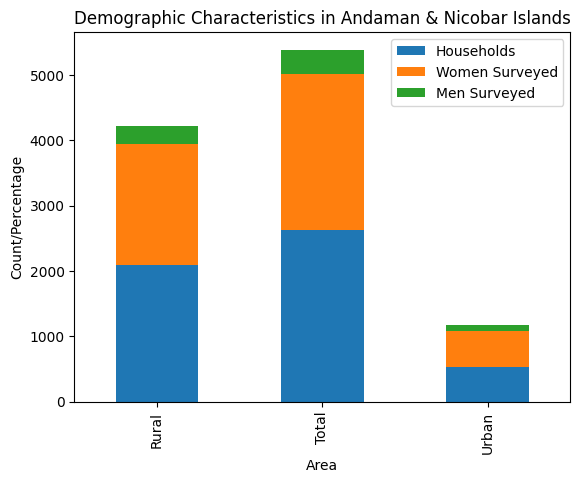

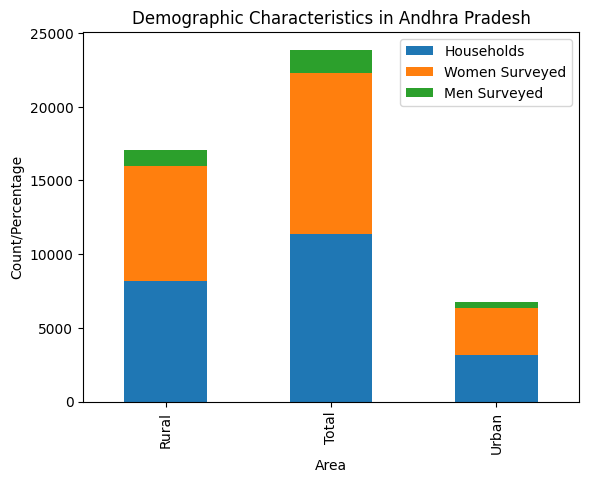

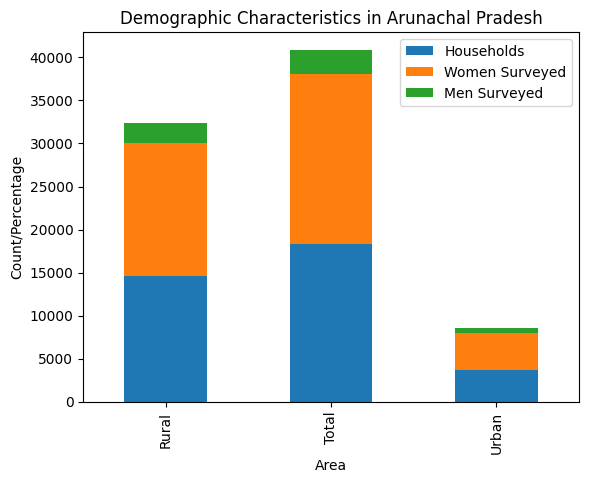

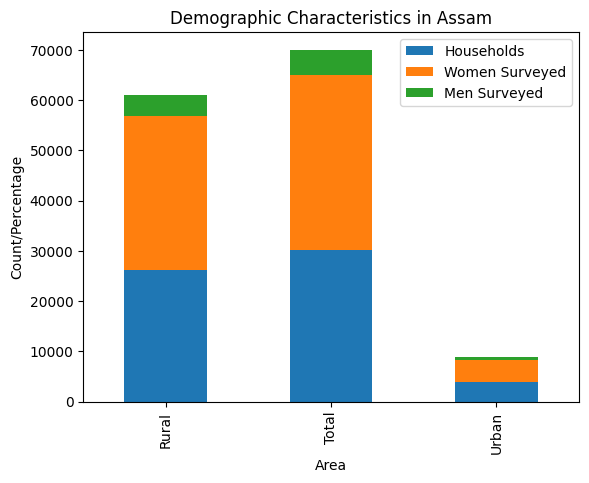

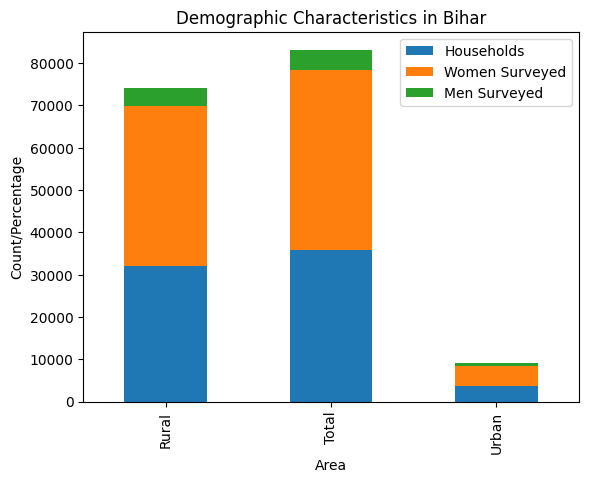

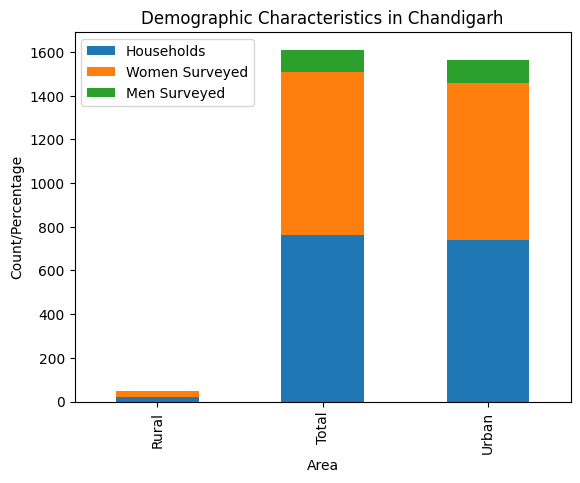

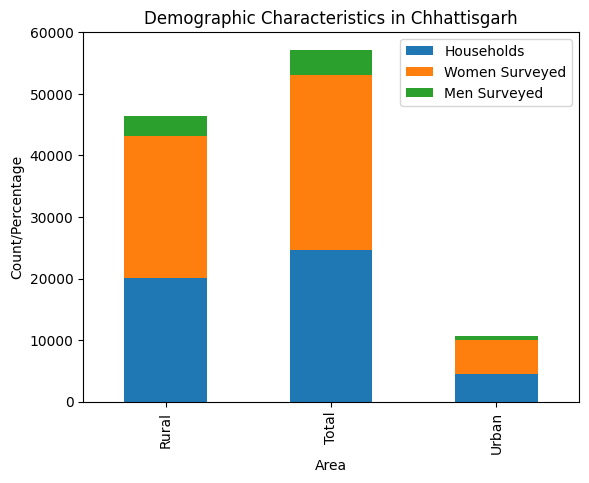

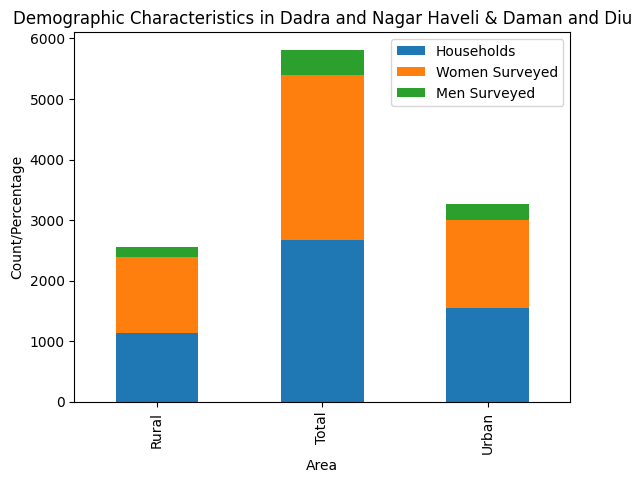

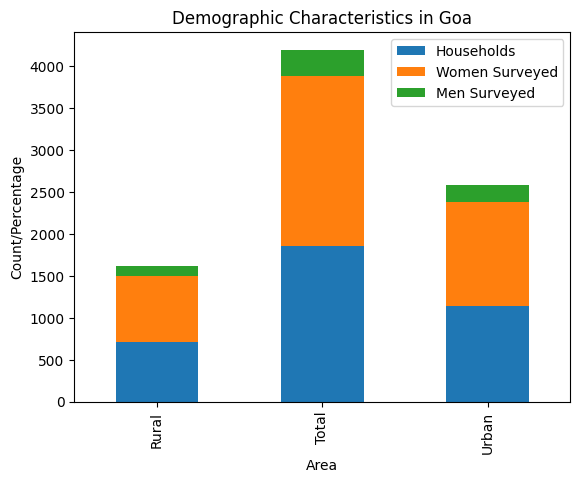

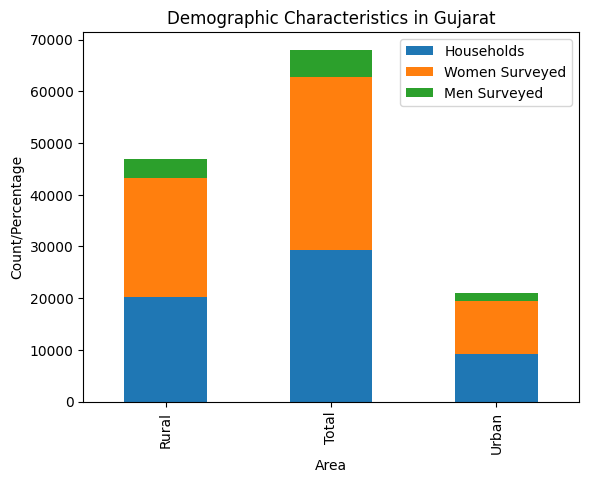

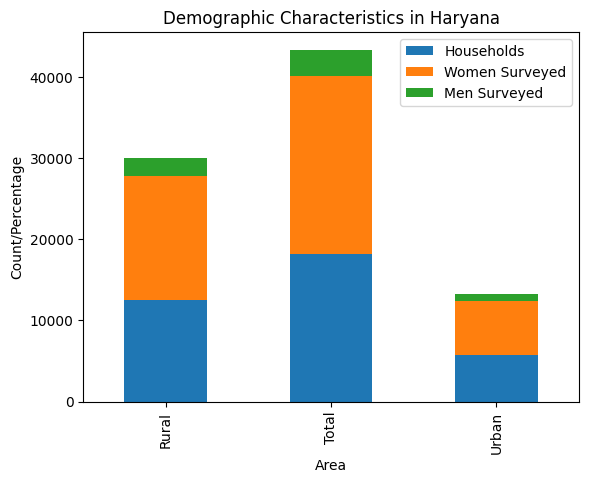

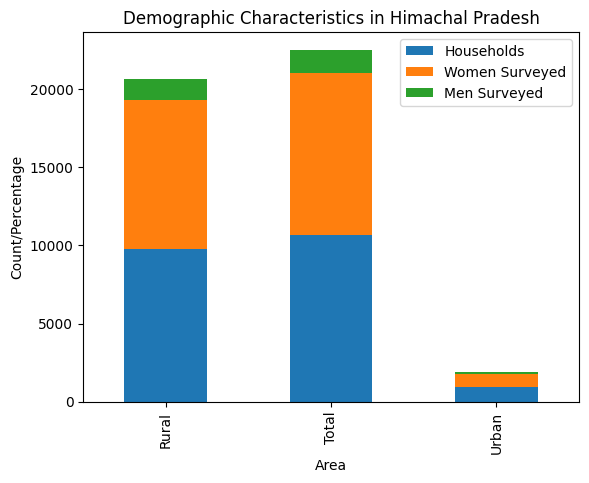

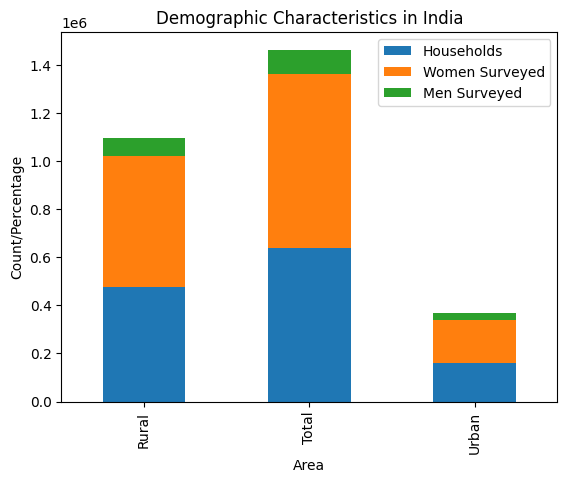

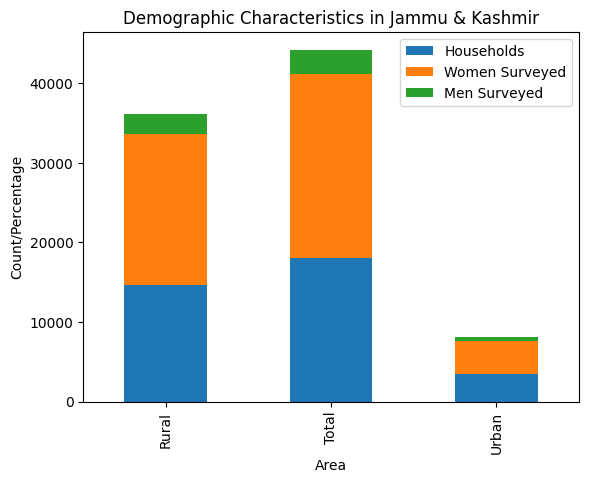

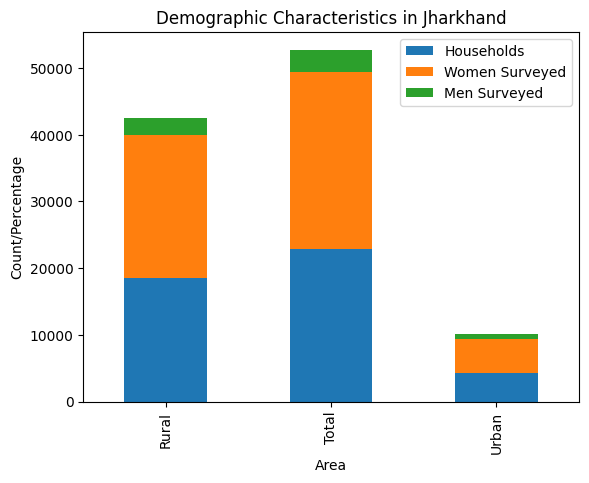

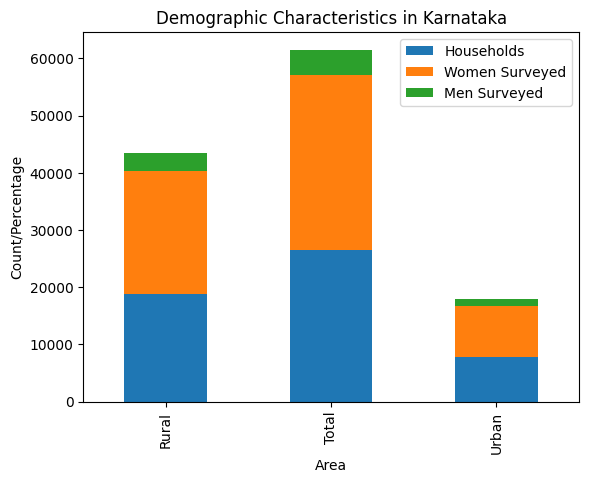

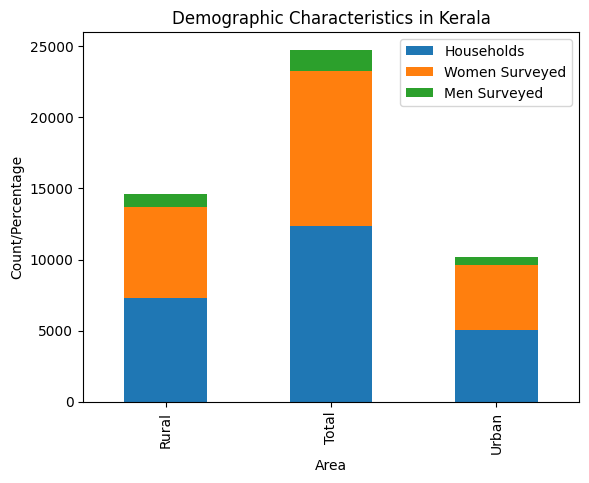

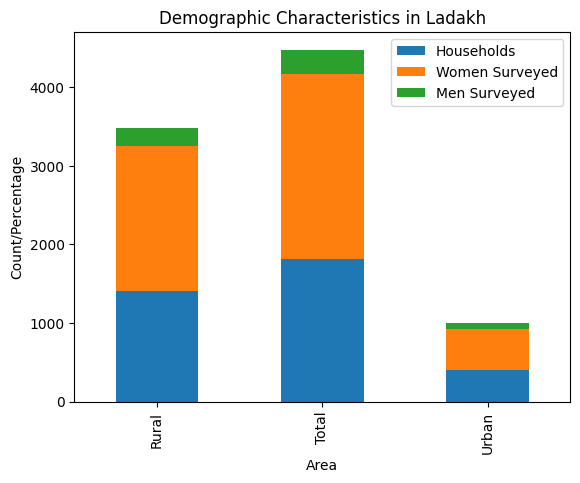

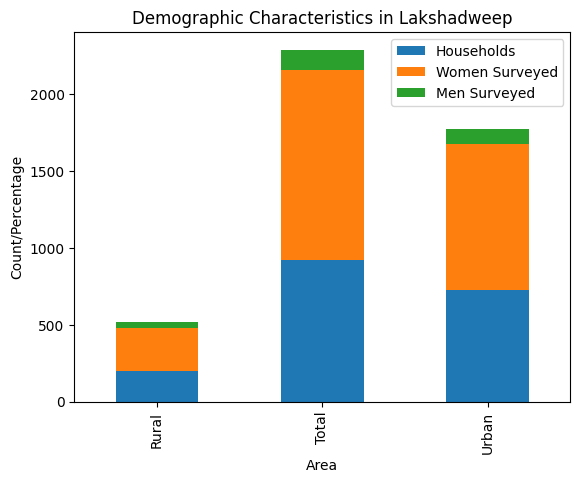

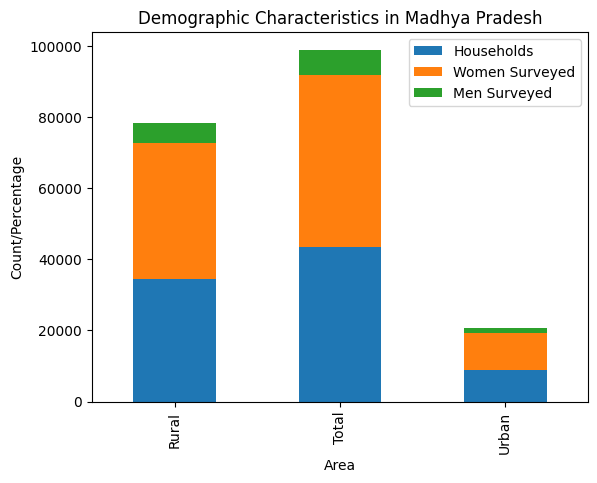

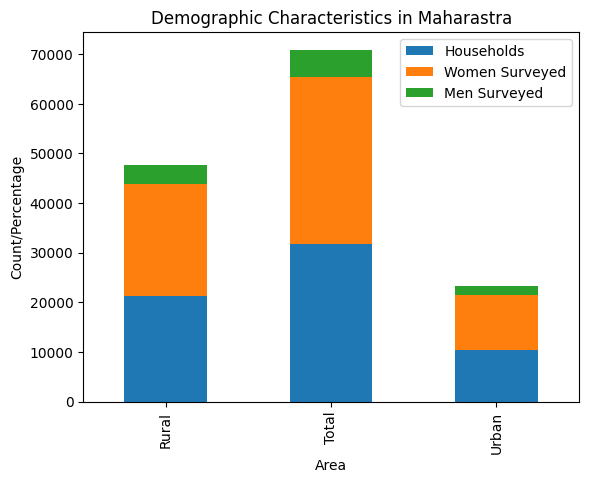

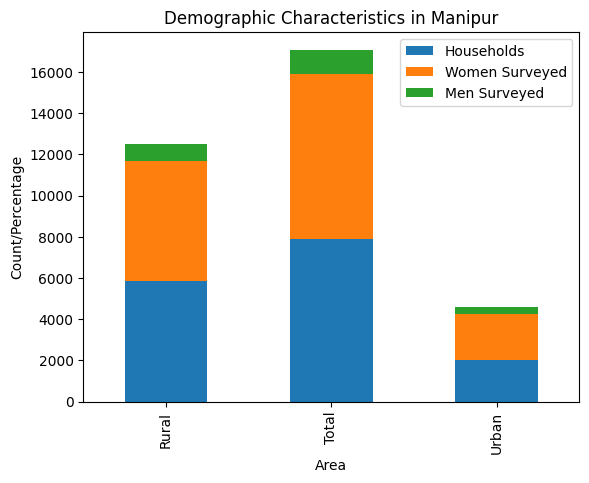

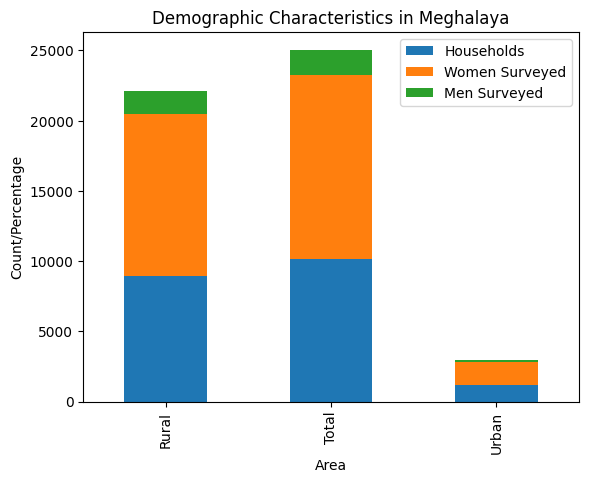

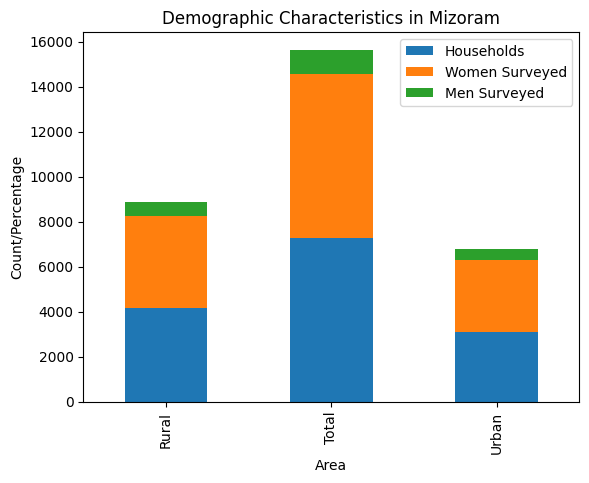

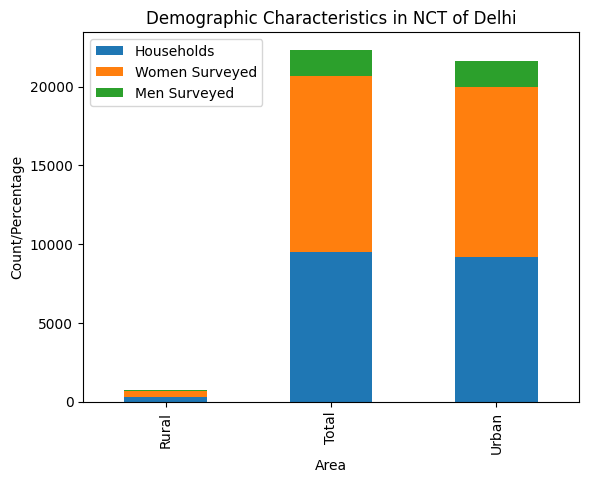

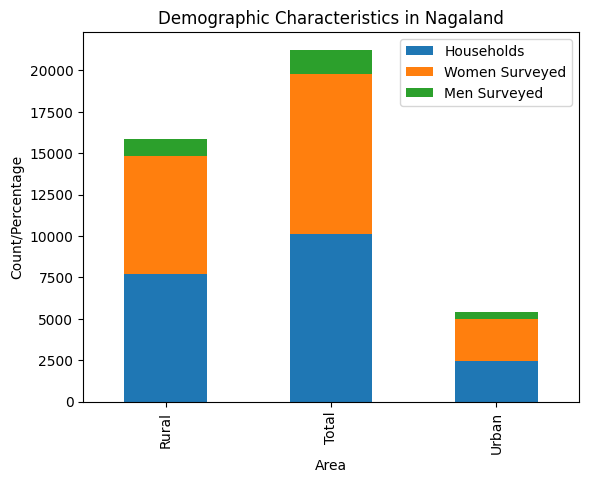

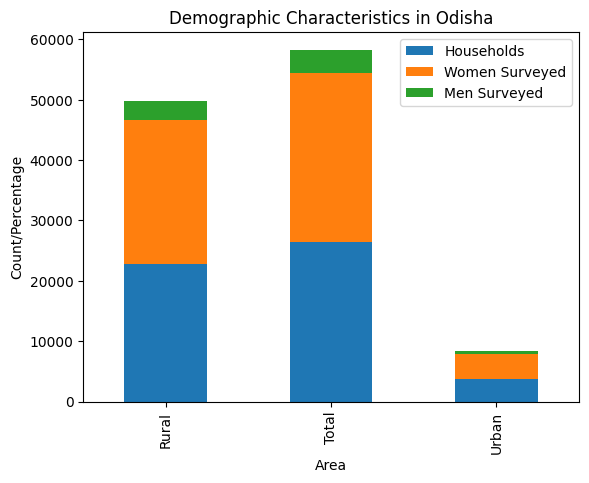

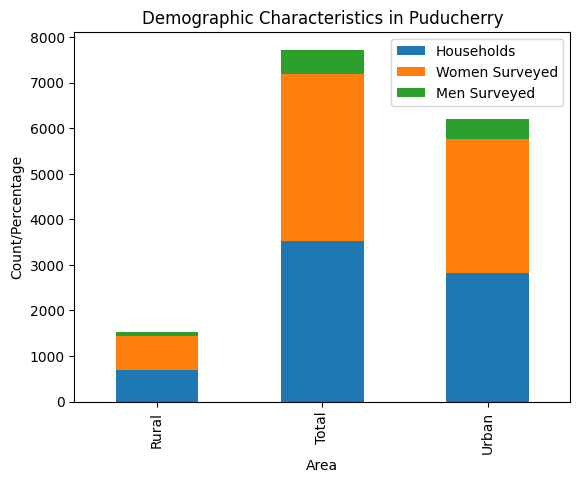

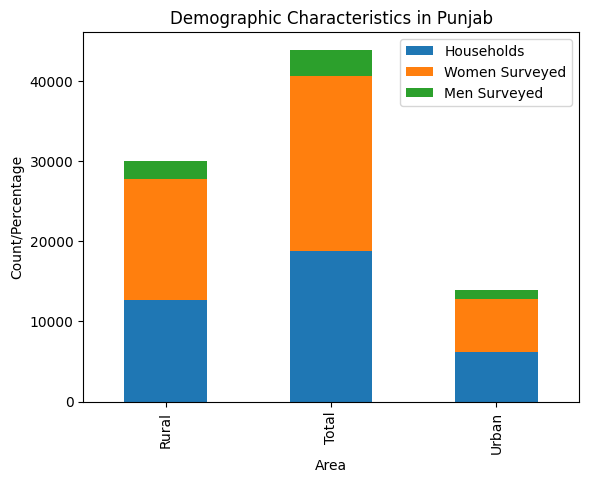

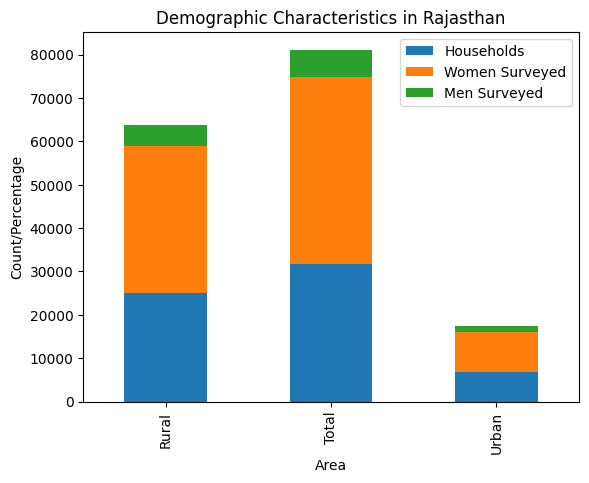

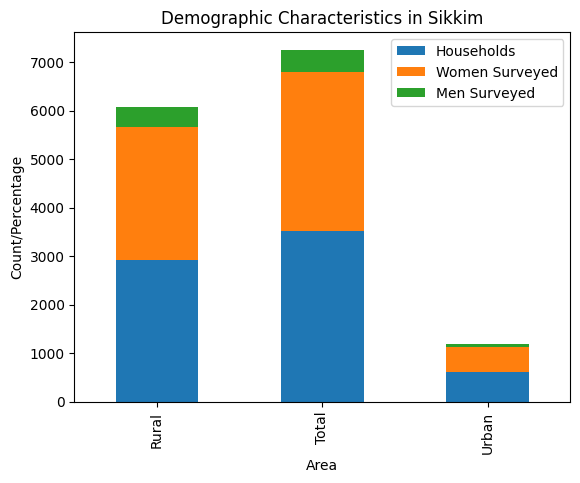

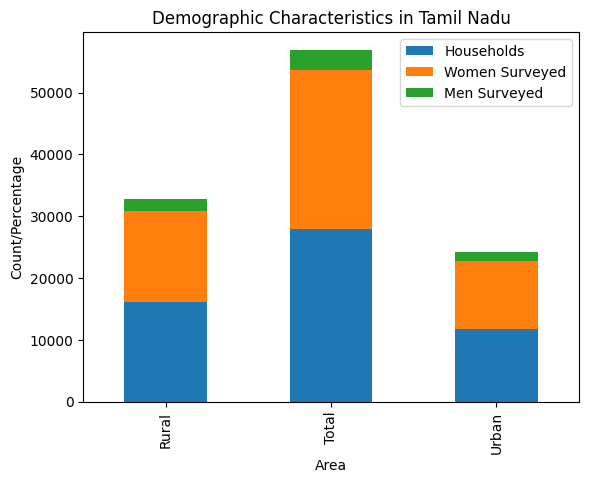

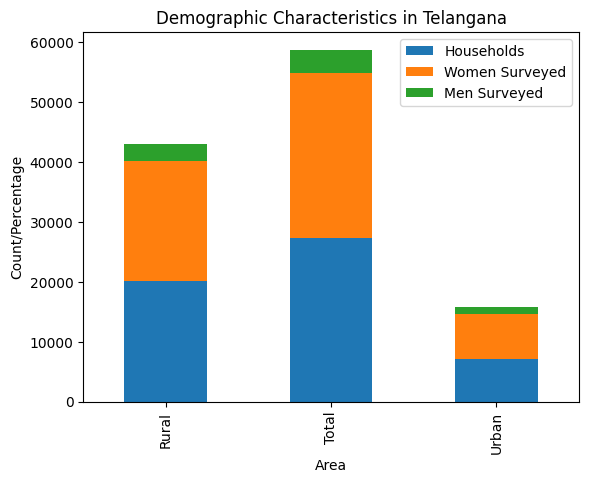

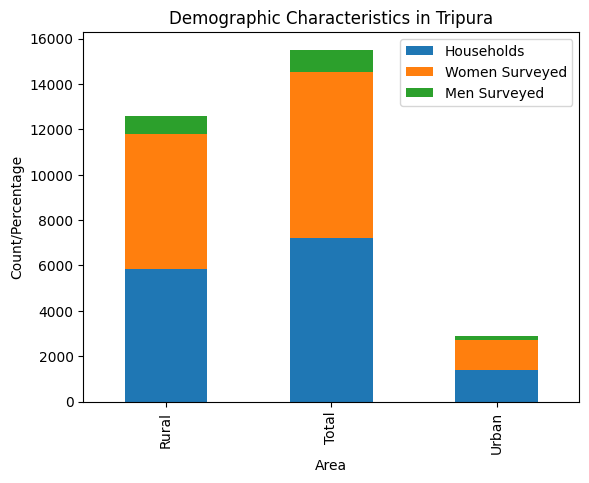

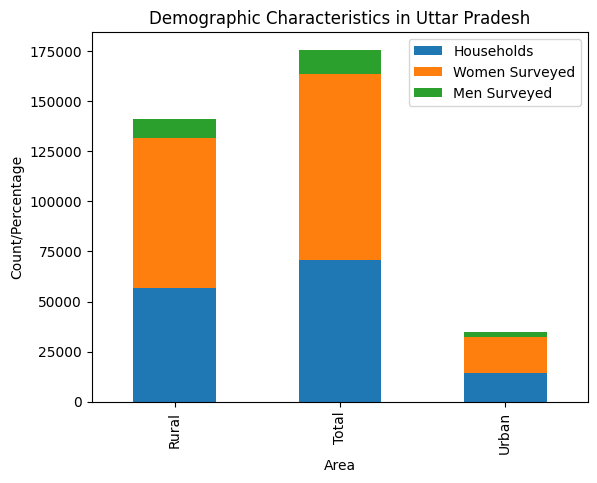

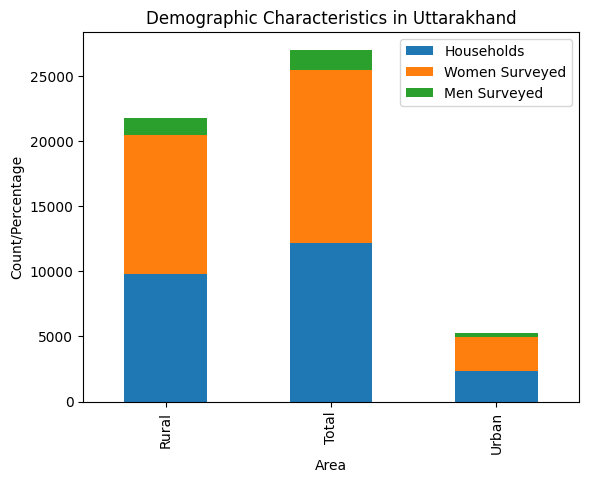

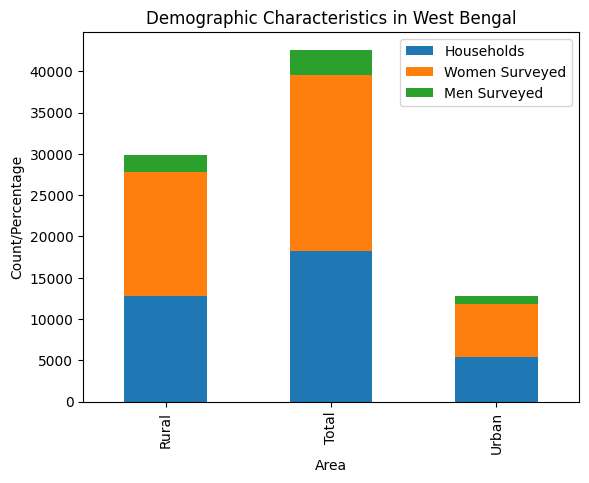

In [ ]:
'''Visualizing following main features in the form of STACKED BAR GRAPH:
----- Households
----- Women Surveyed
----- Men Surveyed'''

#grouping data by States/UTs and Area and calculating the sum of relevant columns
visual_grouped_data = cleaned_data.groupby(['States/UTs','Area'])[['Households','Women Surveyed','Men Surveyed']].sum().reset_index()

#closing all other open figures to avoid RunTimeWarnings
plt.close('all')

#plotting grouped and stacked data for each state
for state in visual_grouped_data['States/UTs'].unique():
  state_data = visual_grouped_data[visual_grouped_data['States/UTs']==state]

  state_data.plot(kind='bar', x='Area', y=['Households', 'Women Surveyed', 'Men Surveyed'],
                    stacked=True, title=f'Demographic Characteristics in {state}',
                    xlabel='Area', ylabel='Count/Percentage', legend=True)

plt.show()

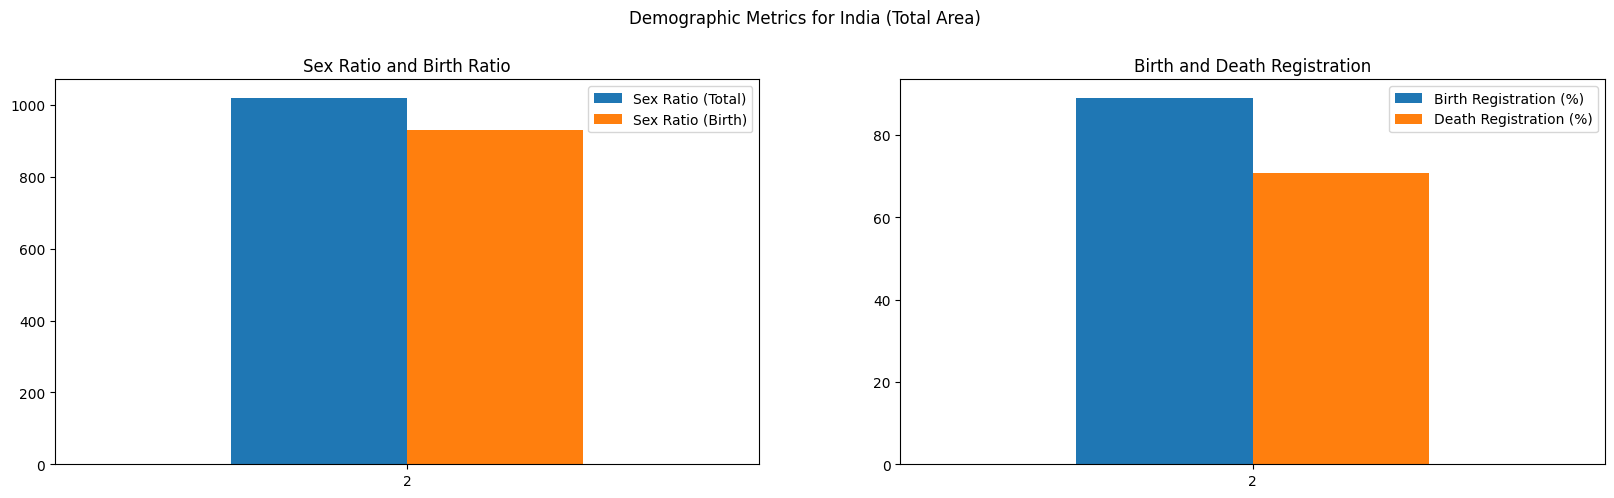

In [ ]:
'''Visualizing following main features in the form of PIE CHART:
----- Sex Ratio (Total)
----- Sex Ratio (Birth)
----- Birth Registration (%)
----- Death Registration (%)'''

#extracting relevant columns for plotting pie chart
#kindly note that here we are not focusing on urban and rural areas
#we are considering plotting data values related to Total Area and entire India

india_data = cleaned_data[(cleaned_data['States/UTs'] == 'India') & (cleaned_data['Area'] == 'Total')][['Sex Ratio (Total)','Sex Ratio (Birth)', 'Birth Registration (%)', 'Death Registration (%)']]

# Plotting grouped bar chart for Sex Ratio and Birth Ratio
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Demographic Metrics for India (Total Area)', y=1.02)

# Sex Ratio and Birth Ratio
india_data[['Sex Ratio (Total)', 'Sex Ratio (Birth)']].plot(kind='bar', ax=axes[0], rot=0)
axes[0].set_title('Sex Ratio and Birth Ratio')

# Birth and Death Registration
india_data[['Birth Registration (%)', 'Death Registration (%)']].plot(kind='bar', ax=axes[1], rot=0)
axes[1].set_title('Birth and Death Registration')

plt.show()

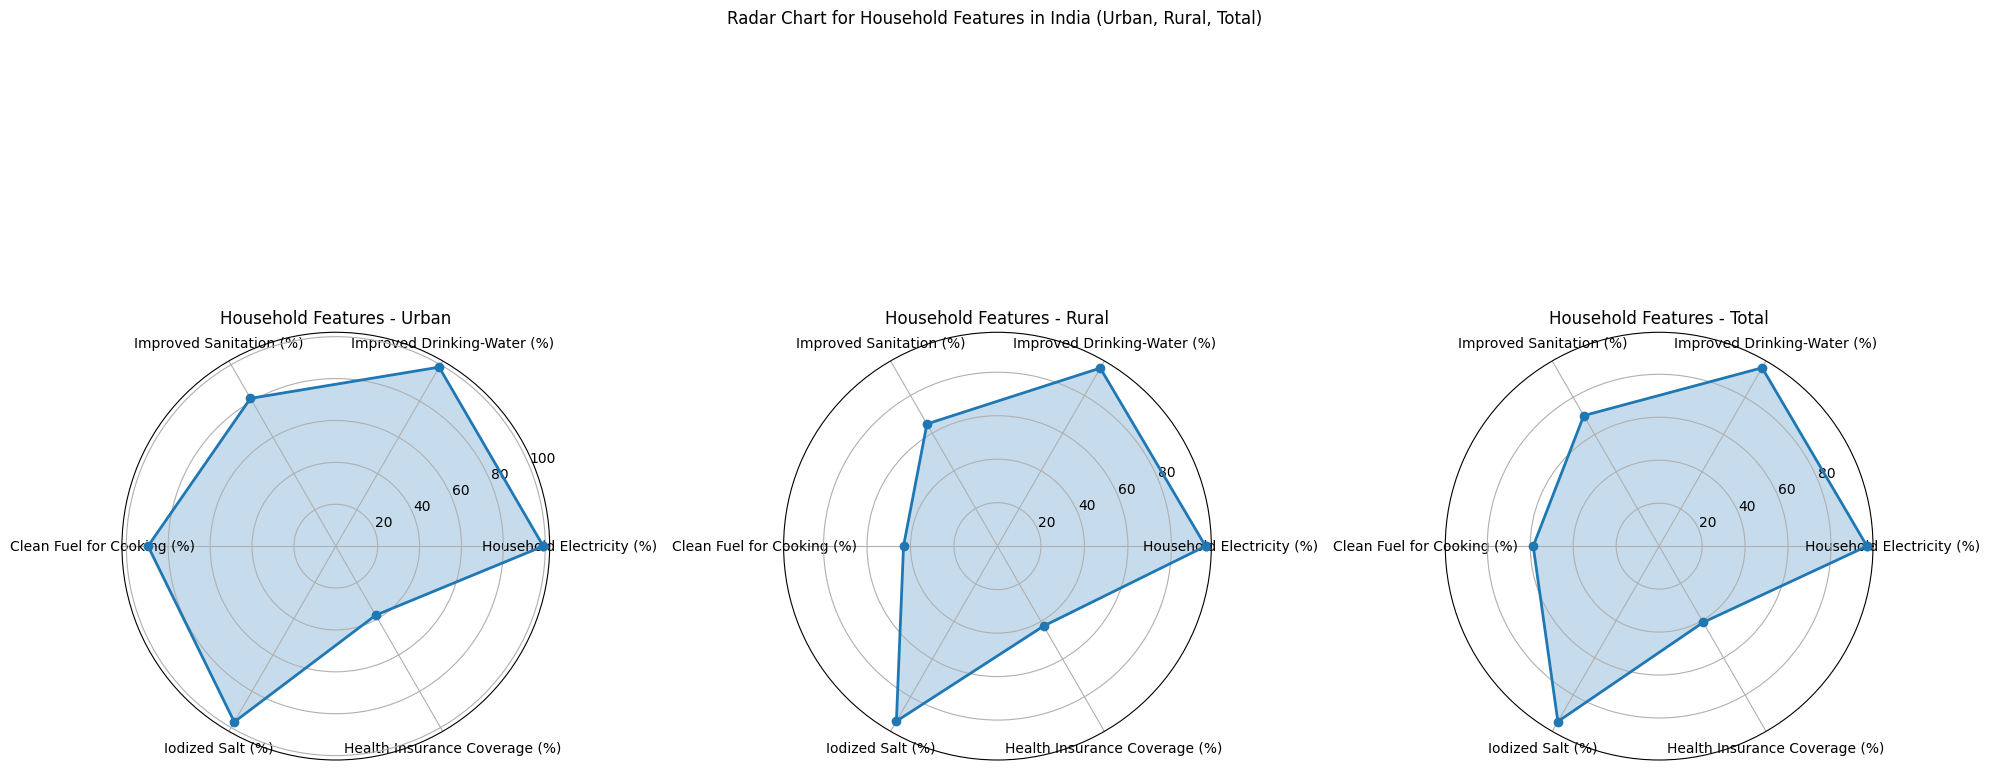

In [ ]:
'''Visualizing following main features in the form of RADAR CHART:
----- Household Electricity (%)
----- Improved Drinking-Water (%)
----- Improved Sanitation (%)
----- Clean Fuel for Cooking (%)
----- Iodized Salt (%)
----- Health Insurance Coverage (%)'''

# Extract relevant columns for Urban, Rural, and Total areas in India
urban_data = cleaned_data[(cleaned_data['States/UTs'] == 'India') & (cleaned_data['Area'] == 'Urban')][['Household Electricity (%)', 'Improved Drinking-Water (%)', 'Improved Sanitation (%)', 'Clean Fuel for Cooking (%)', 'Iodized Salt (%)', 'Health Insurance Coverage (%)']]
rural_data = cleaned_data[(cleaned_data['States/UTs'] == 'India') & (cleaned_data['Area'] == 'Rural')][['Household Electricity (%)', 'Improved Drinking-Water (%)', 'Improved Sanitation (%)', 'Clean Fuel for Cooking (%)', 'Iodized Salt (%)', 'Health Insurance Coverage (%)']]
total_data = cleaned_data[(cleaned_data['States/UTs'] == 'India') & (cleaned_data['Area'] == 'Total')][['Household Electricity (%)', 'Improved Drinking-Water (%)', 'Improved Sanitation (%)', 'Clean Fuel for Cooking (%)', 'Iodized Salt (%)', 'Health Insurance Coverage (%)']]

# Plotting radar chart for each area type
fig, axes = plt.subplots(1, 3, figsize=(20, 10), subplot_kw=dict(polar=True))
fig.suptitle('Radar Chart for Household Features in India (Urban, Rural, Total)', y=1.02)

# Number of features
num_features = len(total_data.columns)

# Categories for the radar chart
categories = total_data.columns

#Function to plot radar chart
def plot_radar(ax,data,area_type):
  values = data.iloc[0].values
  angles = np.linspace(0, 2*np.pi, num_features, endpoint = False).tolist()
  values = np.concatenate((values,[values[0]])) #closing the circle
  angles+= angles[:1]

  ax.plot(angles,values,'o-',linewidth = 2, label = area_type)
  ax.fill(angles,values,alpha=0.25)

  ax.set_thetagrids(np.degrees(angles[:-1]), categories)
  ax.set_title(f'Household Features - {area_type}')

# Plotting radar charts for each area type
plot_radar(axes[0], urban_data, 'Urban')
plot_radar(axes[1], rural_data, 'Rural')
plot_radar(axes[2], total_data, 'Total')

plt.tight_layout()
plt.show()

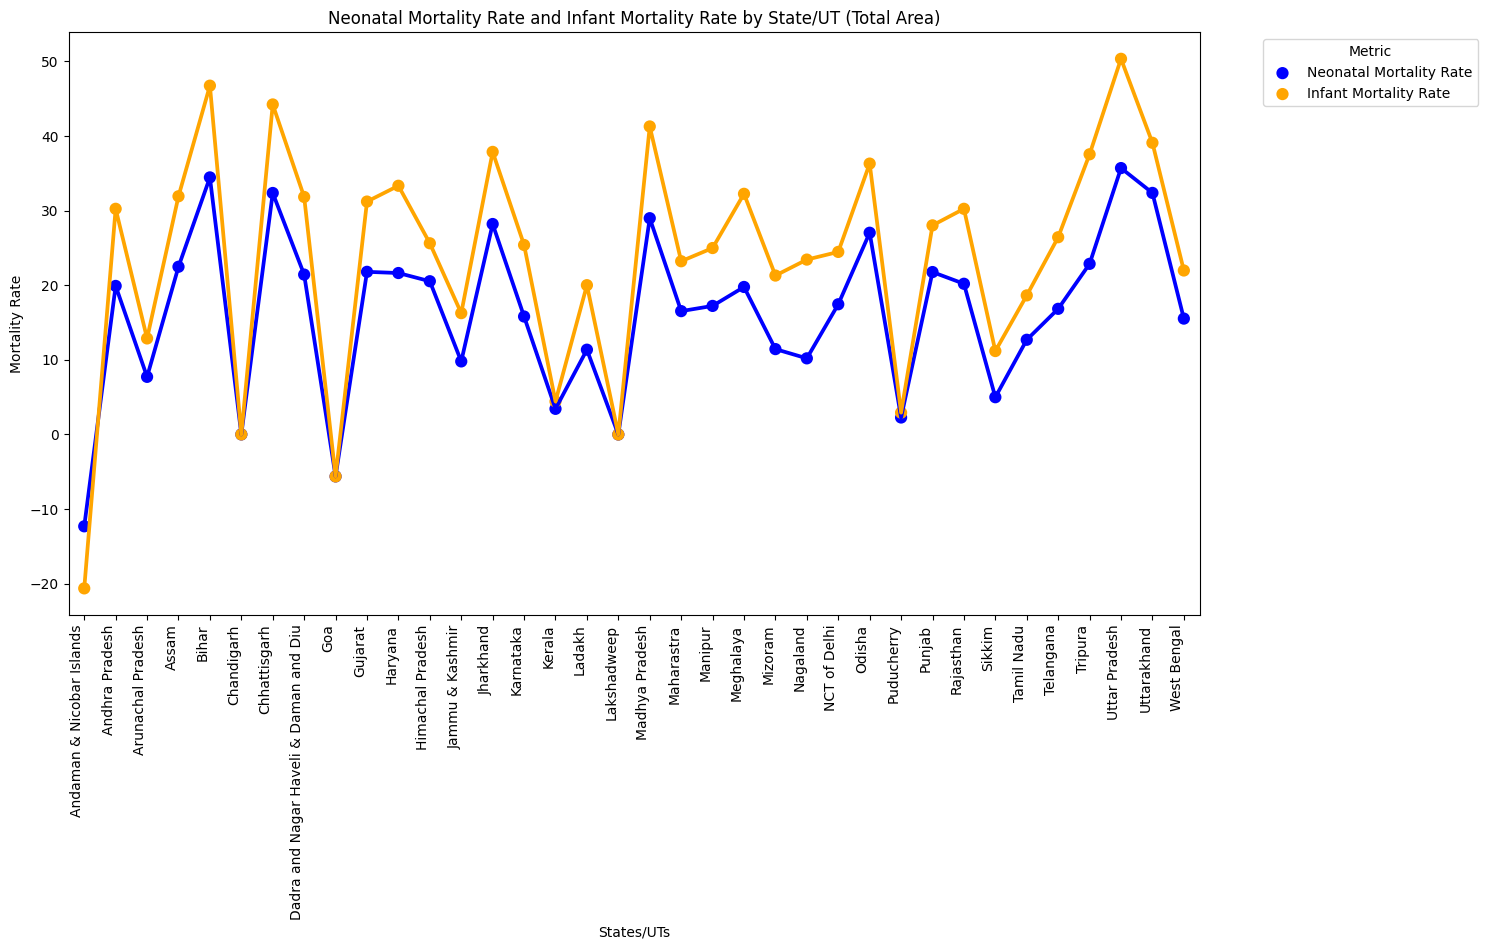

In [ ]:
'''Visualizing following main features in the form of LINE CHART:
----- Neonatal Mortality Rate (%)
----- Infant Mortality Rate (%)
for every state and UTs in India and Total Area'''

# Exclude 'India' and filter for 'Total' area
total_data = cleaned_data[(cleaned_data['States/UTs']!='India') & (cleaned_data['Area'] == 'Total')]

# Plotting line charts for Neonatal Mortality Rate and Infant Mortality Rate for each State/UT in 'Total' area
plt.figure(figsize=(15, 10))
plt.title('Neonatal Mortality Rate and Infant Mortality Rate by State/UT (Total Area)')

#Neonatal Mortality Rate
sns.pointplot(x='States/UTs', y='Neonatal Mortality Rate', data=total_data, color='blue', label='Neonatal Mortality Rate', dodge=True)

#Infant Mortality Rate
sns.pointplot(x='States/UTs', y='Infant Mortality Rate', data=total_data, color='orange', label='Infant Mortality Rate', dodge=True)

plt.xticks(rotation = 90, ha = 'right')
plt.ylabel('Mortality Rate')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Figure size 2000x2000 with 0 Axes>

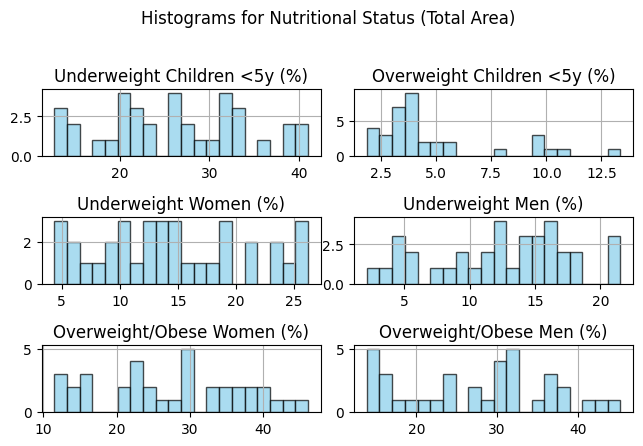

In [ ]:
'''Visualizing following main features in the form of HISTOGRAM:
----- Underweight Children <5y (%)
----- Overweight Children <5y (%)
----- Underweight Women (%)
----- Underweight Men (%)
----- Overweight/Obese Women (%)
----- Overweight/Obese Men (%)'''
# Extracting relevant columns for nutritional status
nutritional_status_data = cleaned_data.loc[
    (cleaned_data['Area'] == 'Total') & (cleaned_data['States/UTs'] != 'India'),
    ['Underweight Children <5y (%)', 'Overweight Children <5y (%)',
     'Underweight Women (%)', 'Underweight Men (%)',
     'Overweight/Obese Women (%)', 'Overweight/Obese Men (%)']]

# Plotting histograms for nutritional status
plt.figure(figsize=(20, 20))
nutritional_status_data.hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.suptitle('Histograms for Nutritional Status (Total Area)', y=0.92)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

**CORRELATION ANALYSIS**

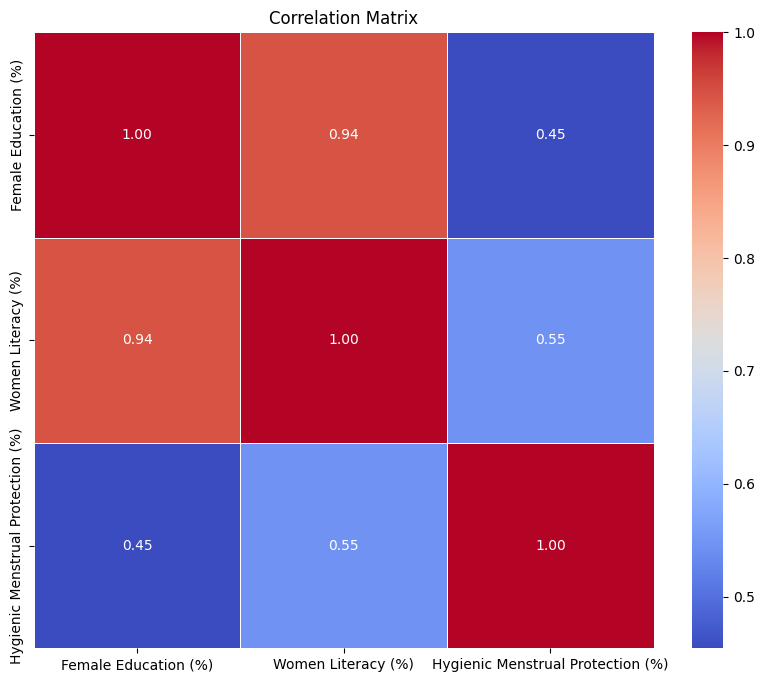

In [ ]:
'''Performing correlation analysis on the following main features from our dataframe:
----- Female Education (%)
----- Women Literacy (%)
----- Hygienic Menstrual Protection (%)'''

# Select columns for correlation analysis
columns_for_correlation = ['Female Education (%)', 'Women Literacy (%)', 'Hygienic Menstrual Protection (%)']

#grouping our data based on TOtal Area, States/UTs and above columns
correlation_data = cleaned_data.loc[(cleaned_data['Area'] == 'Total') & (cleaned_data['States/UTs'] != 'India'),columns_for_correlation]
correlation_data.dropna()

#creating a correlation matrix for the correlation_Data
correlation_matrix = correlation_data.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


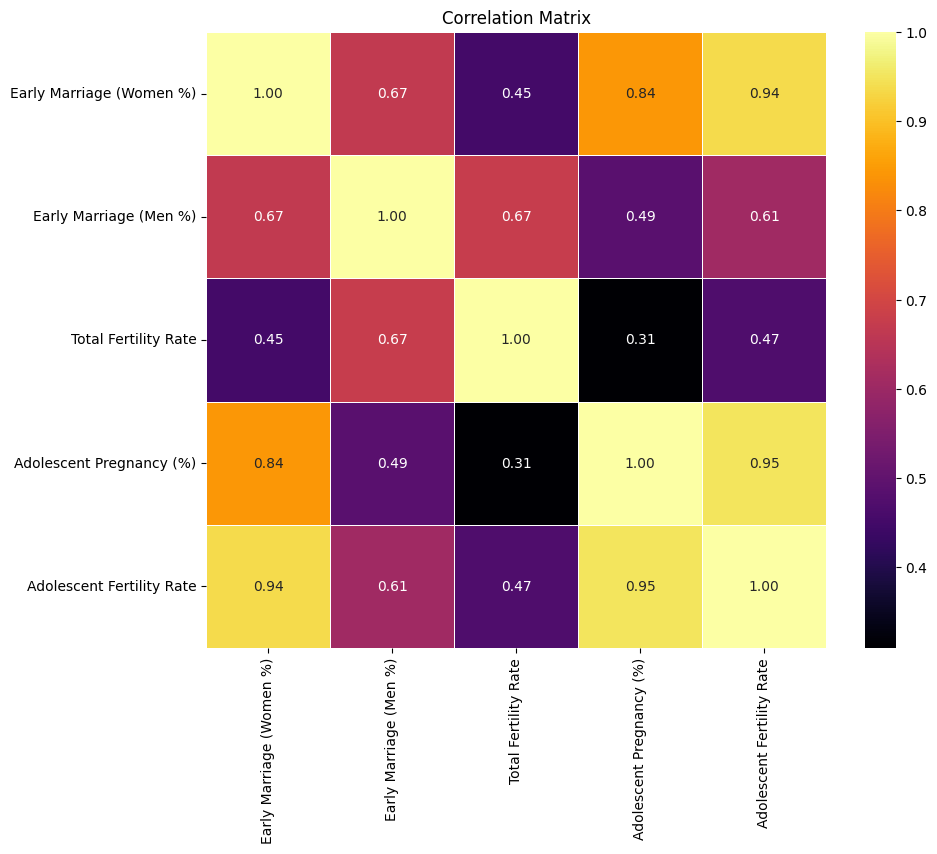

In [ ]:
'''Performing correlation analysis on the following main features from our dataframe:
----- Early Marriage (Women %)
----- Early Marriage (Men %)
----- Total Fertility Rate
----- Adolescent Pregnancy (%)
----- Adolescent Fertility Rate'''

# Select columns for correlation analysis
columns_for_correlation = ['Early Marriage (Women %)', 'Early Marriage (Men %)', 'Total Fertility Rate','Adolescent Pregnancy (%)','Adolescent Fertility Rate']

# grouping our data based on TOtal Area, States/UTs and above columns
correlation_data = cleaned_data.loc[(cleaned_data['Area'] == 'Total') & (cleaned_data['States/UTs'] != 'India'),columns_for_correlation]
correlation_data.dropna()

#creating a correlation matrix for the correlation_Data
correlation_matrix = correlation_data.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



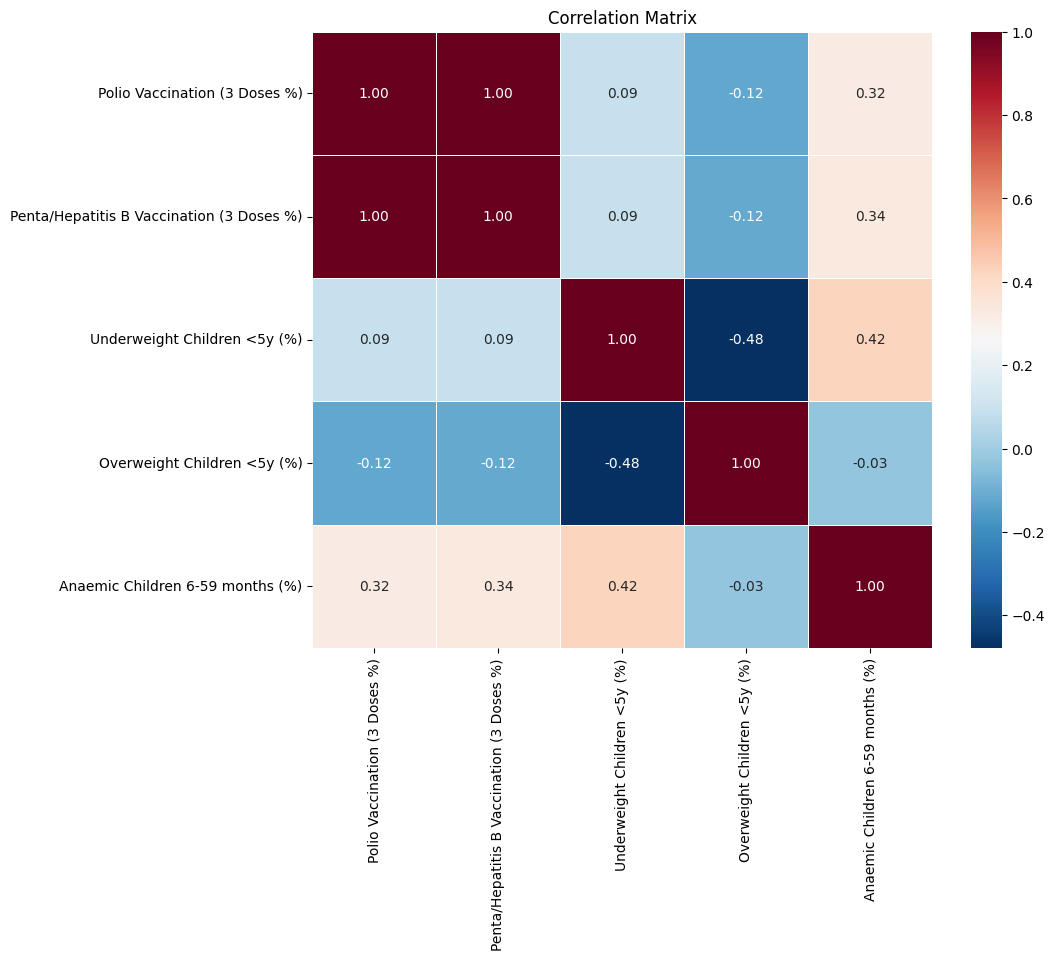

In [ ]:
'''Performing correlation analysis on the following main features from our dataframe:
----- Polio Vaccination (3 Doses %)
----- Penta/Hepatitis B Vaccination (3 Doses %)
----- Underweight Children <5y (%)
----- Overweight Children <5y (%)
----- Anaemic Children 6-59 months (%)'''

# Select columns for correlation analysis
columns_for_correlation = ['Polio Vaccination (3 Doses %)', 'Penta/Hepatitis B Vaccination (3 Doses %)', 'Underweight Children <5y (%)','Overweight Children <5y (%)','Anaemic Children 6-59 months (%)']

#grouping our data based on TOtal Area, States/UTs and above columns
correlation_data = cleaned_data.loc[(cleaned_data['Area'] == 'Total') & (cleaned_data['States/UTs'] != 'India'),columns_for_correlation]
correlation_data.dropna()

#creating a correlation matrix for the correlation_Data
correlation_matrix = correlation_data.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**HEALTH OUTCOME ANALYSIS**

<Figure size 800x900 with 0 Axes>

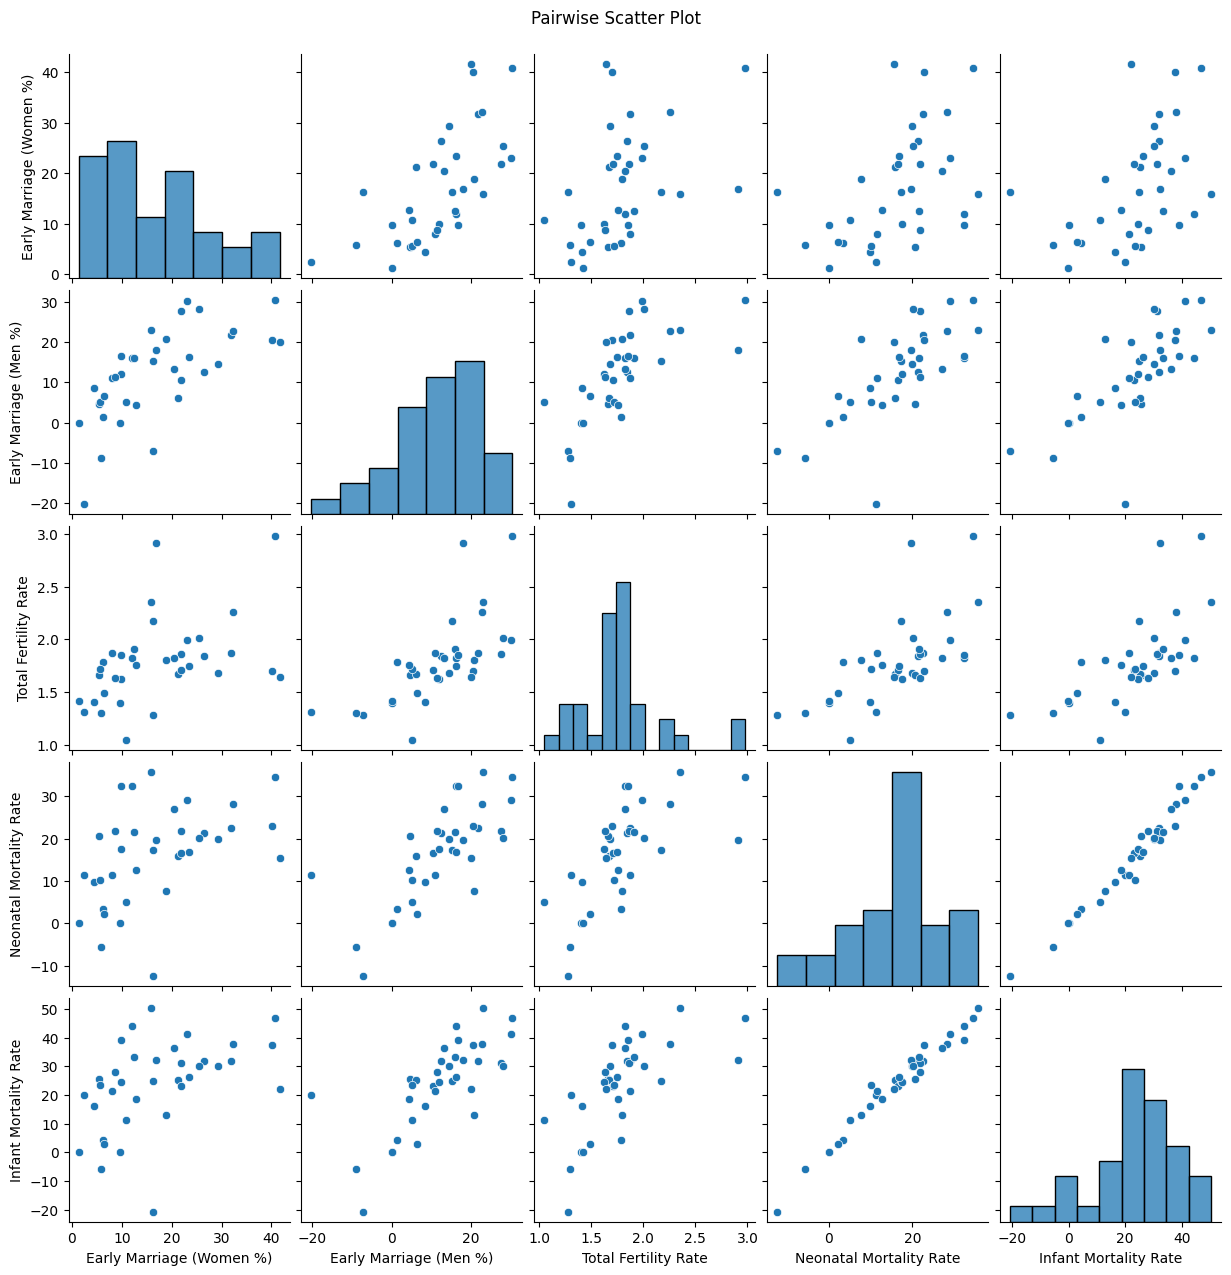

In [ ]:
''' Visualizing relationship between following features on a scatter plot:
----- Early Marriage (Women %)
----- Early Marriage (Men %)
----- Total Fertility Rate
----- Neonatal Mortality Rate
----- Infant Mortality Rate'''

#Firstly selecting the columns for analysis
columns_for_analysis = ['Early Marriage (Women %)', 'Early Marriage (Men %)', 'Total Fertility Rate', 'Neonatal Mortality Rate', 'Infant Mortality Rate']

#cleaning and selecting relevant data for plotting
scatter_data = cleaned_data.loc[(cleaned_data['Area'] == 'Total') & (cleaned_data['States/UTs'] != 'India'), columns_for_analysis].dropna()

#vizualizing the scatter plot for scatter_Data
plt.figure(figsize = (8, 9))
sns.pairplot(scatter_data)
plt.suptitle('Pairwise Scatter Plot', y=1.02)
plt.show()